# CSE 40647 Data Science Final Project

Project: Investigating the Influence of Social and Economic Factors on College Students' Graduation and Dropout Rates

Students:
- Noor Maria Achkar (nachkar@nd.edu)
- Tram Trinh (htrinh@nd.edu)

### Starter Code

In [56]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# For plot formatting.
plt.style.use = 'default'
plt.rcParams["patch.force_edgecolor"] = True  # helpful for matplotlib version greater than 2

# Read the file into a DataFrame.
raw_data = pd.read_csv('./dataset.csv')

# Output the first few rows of the dataset.
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding and Preprocessing

In [5]:
raw_data.shape

(4424, 35)

In [6]:
raw_data.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1          

In [8]:
# Check for NULL
print(raw_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [9]:
# Check for duplicates
print(raw_data.duplicated().sum())

0


In [10]:
raw_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [11]:
# Filter the DataFrame to keep only 'Dropout' and 'Graduate' rows
data = raw_data[raw_data['Target'].isin(['Dropout', 'Graduate'])]
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
# Drop columns

data = data.drop(columns=['Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Application mode', 'Application order', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)' ], axis=1)


In [13]:
data.head()

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate


#### Summary Statistics

In [14]:
# Select continuous features
continuous_features = data[[
    'Age at enrollment',
    'Course',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]]

# Get statistics for each continuous feature
statistics = continuous_features.describe()
print(statistics.loc[['min', 'max', 'mean', 'std']])

      Age at enrollment     Course  Unemployment rate  Inflation rate  \
min           17.000000   1.000000           7.600000       -0.800000   
max           70.000000  17.000000          16.200000        3.700000   
mean          23.461157   9.935537          11.630358        1.231598   
std            7.827994   4.340715           2.667652        1.384911   

           GDP  
min  -4.060000  
max   3.510000  
mean -0.009256  
std   2.259986  


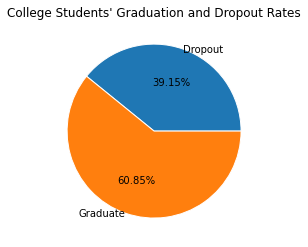

In [15]:
# Count the occurrences of each unique class 
count = []
for target_value in data['Target'].unique():
    count.append(data['Target'].tolist().count(target_value))

# Create the pie chart
plt.pie(count, labels=data['Target'].unique(), autopct="%.2f%%", labeldistance=1., 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'color': 'black', 'fontsize': 10})
plt.title('College Students\' Graduation and Dropout Rates')

plt.show()

### Preprocessing Data

In [16]:
y = data['Target']
# Convert y column to 1/0
y = (y == 'Graduate').astype(int)

In [17]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

In [18]:
X = data.drop('Target', axis=1)

In [19]:
X

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,6,5,0,0,0,1,1,0,19,0,15.5,2.8,-4.06
4420,1,15,1,1,10,10,1,0,1,0,0,0,18,1,11.1,0.6,2.02
4421,1,12,22,27,10,10,1,0,0,1,0,1,30,0,13.9,-0.3,0.79
4422,1,9,22,27,8,5,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12


# Evaluation Metrics

In [20]:
def display_confusion_matrix(tp, fp, tn, fn) -> None:
    print('\t\t |  Predicted Positive  |  Predicted Negative  |')
    print('-'*64)
    print(f'Actual Positive  |\t      {tp}      \t|\t    {fn}\t       |')
    print(f'Actual Negative  |\t      {fp}      \t|\t    {tn}\t       |')
    print('-'*64)
    print(f'Accuracy: {accuracy(tp, fp, tn, fn)}')
    print(f'Recall: {recall(tp, fp, tn, fn)}')
    print(f'Precision: {precision(tp, fp, tn, fn)}')
    print(f'F1: {f1score(tp, fp, tn, fn)}')

In [21]:
def calculate_metrics(actual_y, preds_y) -> None:
    tp = sum((preds_y == 1) & (actual_y == 1)) 
    fp = sum((preds_y == 1) & (actual_y == 0)) 
    fn = sum((preds_y == 0) & (actual_y == 1)) 
    tn = sum((preds_y == 0) & (actual_y == 0)) 
    display_confusion_matrix(tp, fp, tn, fn)

In [22]:
def accuracy(tp: int, fp: int, tn: int, fn: int) -> float:
    return (tp + tn) / (tp + tn + fp + fn)

In [23]:
def recall(tp: int, fp: int, tn: int, fn: int) -> float:
    if tp + fn == 0:
        return np.nan 
    return tp / (tp + fn) 

In [24]:
def precision(tp: int, fp: int, tn: int, fn: int) -> float:
    if tp + fp == 0:
        return np.nan 
    return tp / (tp + fp)

In [25]:
def f1score(tp: int, fp: int, tn: int, fn: int) -> float:
    p = precision(tp, fp, tn, fn)
    r = recall(tp, fp, tn, fn)
    if p == np.nan or r == np.nan:
        return np.nan 
    return 2 * (p * r) / (p + r)

## Train and Test Sets

In [ ]:
# Encode data if needed before split for train and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Models

In [37]:
# Random guess: create predictions for the test set based on the majority class in the training set
def pred_majority_class(X_test: pd.DataFrame, y_train: pd.DataFrame):
    if y_train.value_counts()[0] > y_train.value_counts()[1]:
        return np.repeat(0, X_test.shape[0])
    else:
        return np.repeat(1, X_test.shape[0])

In [27]:
nb_mdl = GaussianNB()
nb_mdl.fit(X_train, y_train)

GaussianNB()

In [28]:
dt_mdl = DecisionTreeClassifier(random_state=2222)
dt_mdl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2222)

In [29]:
rf_mdl = RandomForestClassifier(random_state=53)
rf_mdl.fit(X_train, y_train)

RandomForestClassifier(random_state=53)

In [57]:
logreg_mdl = LogisticRegression(random_state=0, solver='liblinear')
logreg_mdl.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

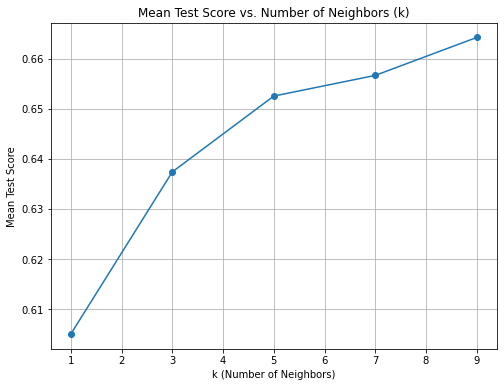

Best k value: 9


In [52]:
knn_mdl = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn_mdl, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# cross-validation results
results = pd.DataFrame(grid_search.cv_results_)

k_values = results['param_n_neighbors'].astype(int)
mean_test_scores = results['mean_test_score']

# Show the mean test scores for each k value
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

# get the best k 
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

In [53]:
knn_mdl = KNeighborsClassifier(n_neighbors=best_k)
knn_mdl.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

# Evaluate Models

In [58]:
random_guess_preds = pred_majority_class(X_test, y_train)
naive_bayes_preds = nb_mdl.predict(X_test)
decision_tree_preds = dt_mdl.predict(X_test)
random_forest_preds = rf_mdl.predict(X_test)
logistic_regression_preds = logreg_mdl.predict(X_test)
knn_preds = knn_mdl.predict(X_test)

In [59]:
print("Random Guess:")
calculate_metrics(y_test, random_guess_preds)

Random Guess:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      449      	|	    0	       |
Actual Negative  |	      277      	|	    0	       |
----------------------------------------------------------------
Accuracy: 0.6184573002754821
Recall: 1.0
Precision: 0.6184573002754821
F1: 0.7642553191489362


In [60]:
print("Naive Bayes:")
calculate_metrics(y_test, naive_bayes_preds)

Naive Bayes:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      402      	|	    47	       |
Actual Negative  |	      146      	|	    131	       |
----------------------------------------------------------------
Accuracy: 0.7341597796143251
Recall: 0.8953229398663697
Precision: 0.7335766423357665
F1: 0.8064192577733199


In [61]:
print("Decsion Tree:")
calculate_metrics(y_test, decision_tree_preds)

Decsion Tree:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      343      	|	    106	       |
Actual Negative  |	      118      	|	    159	       |
----------------------------------------------------------------
Accuracy: 0.6914600550964187
Recall: 0.7639198218262806
Precision: 0.7440347071583514
F1: 0.7538461538461539


In [62]:
print("Random Forest:")
calculate_metrics(y_test, random_forest_preds)

Random Forest:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      383      	|	    66	       |
Actual Negative  |	      111      	|	    166	       |
----------------------------------------------------------------
Accuracy: 0.756198347107438
Recall: 0.8530066815144766
Precision: 0.7753036437246964
F1: 0.8123011664899258


In [63]:
print("Logistic Regression:")
calculate_metrics(y_test, logistic_regression_preds)

Logistic Regression:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      399      	|	    50	       |
Actual Negative  |	      136      	|	    141	       |
----------------------------------------------------------------
Accuracy: 0.743801652892562
Recall: 0.888641425389755
Precision: 0.7457943925233644
F1: 0.8109756097560976


In [64]:
print("KNN:")
calculate_metrics(y_test, knn_preds)

KNN:
		 |  Predicted Positive  |  Predicted Negative  |
----------------------------------------------------------------
Actual Positive  |	      364      	|	    85	       |
Actual Negative  |	      148      	|	    129	       |
----------------------------------------------------------------
Accuracy: 0.6790633608815427
Recall: 0.8106904231625836
Precision: 0.7109375
F1: 0.7575442247658688
